<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("dplyr")
install.packages("ggplot2")
install.packages("readr")
library(readr)
library(dplyr)
library(ggplot2) 

In [4]:
%%R
notas<-read_csv("https://quant-ibmec.group/notas.csv")
notas

Rows: 12 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Curso, Alunos, Conceito
dbl (4): AP1, AP2, AP3, Nota

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 12 × 7
   Curso Alunos    AP1   AP2   AP3  Nota Conceito
   <chr> <chr>   <dbl> <dbl> <dbl> <dbl> <chr>   
 1 ADM   João      9     8     9     8.6 B       
 2 ADM   Maria     6     4    10     6   D       
 3 DIR   José      4     3     4     3.6 F       
 4 ADM   Pedro     8    10     7     8.6 B       
 5 ECO   Paulo     7.5   8     9.5   8.1 B       
 6 DIR   Esther    6     4.5   6     5.4 D       
 7 ADM   Gabriel   8     6     8     7.2 B       
 8 DIR   Rafael    7.5  10     9.5   8.9 B       
 9 ECO   Davi      6    10     7     7.8 B       
10 DIR   Silvio   10     9.5   9.5   9.7 A       
11 ADM   Sofia     8     7     6     7.2 B      

In [5]:
%%R
filter(notas, Nota>7)

# A tibble: 8 × 7
  Curso Alunos    AP1   AP2   AP3  Nota Conceito
  <chr> <chr>   <dbl> <dbl> <dbl> <dbl> <chr>   
1 ADM   João      9     8     9     8.6 B       
2 ADM   Pedro     8    10     7     8.6 B       
3 ECO   Paulo     7.5   8     9.5   8.1 B       
4 ADM   Gabriel   8     6     8     7.2 B       
5 DIR   Rafael    7.5  10     9.5   8.9 B       
6 ECO   Davi      6    10     7     7.8 B       
7 DIR   Silvio   10     9.5   9.5   9.7 A       
8 ADM   Sofia     8     7     6     7.2 B       


In [6]:
%%R
select(notas,Alunos)

# A tibble: 12 × 1
   Alunos 
   <chr>  
 1 João   
 2 Maria  
 3 José   
 4 Pedro  
 5 Paulo  
 6 Esther 
 7 Gabriel
 8 Rafael 
 9 Davi   
10 Silvio 
11 Sofia  
12 Raquel 


In [7]:
%%R
select(filter(notas, Nota>7),Alunos)

# A tibble: 8 × 1
  Alunos 
  <chr>  
1 João   
2 Pedro  
3 Paulo  
4 Gabriel
5 Rafael 
6 Davi   
7 Silvio 
8 Sofia  


In [9]:
%%R
notas %>% filter( Nota>7) %>% select(Alunos)

# A tibble: 8 × 1
  Alunos 
  <chr>  
1 João   
2 Pedro  
3 Paulo  
4 Gabriel
5 Rafael 
6 Davi   
7 Silvio 
8 Sofia  


In [8]:
%%R
alunos_aprovados <- notas %>% filter( Nota>7) %>% select(Alunos)
alunos_aprovados

# A tibble: 8 × 1
  Alunos 
  <chr>  
1 João   
2 Pedro  
3 Paulo  
4 Gabriel
5 Rafael 
6 Davi   
7 Silvio 
8 Sofia  


In [10]:
%%R 
media_por_curso <- notas %>% group_by(Curso) %>% summarize(media_nota = mean(Nota))
media_por_curso 

# A tibble: 3 × 2
  Curso media_nota
  <chr>      <dbl>
1 ADM         6.97
2 DIR         6.9 
3 ECO         7.95


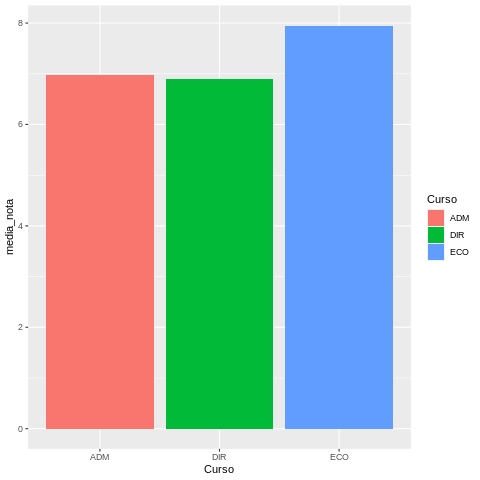

In [11]:
%%R
ggplot(data=media_por_curso,aes(x=Curso,y=media_nota,fill=Curso)) + geom_bar(stat='identity')

In [13]:
%%R
contas <- read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/Plan3%20-%20orig.csv')
contas

Rows: 12 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Meses
dbl (4): Água, Energia, Telefonia, Condomínio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 12 × 6
   Meses      Água Energia Telefonia Condomínio Suprimentos
   <chr>     <dbl>   <dbl>     <dbl>      <dbl>       <dbl>
 1 Janeiro      50     450      154.        980       1340 
 2 Fevereiro    55     425      138         980       2450 
 3 Março        60     400      120         980       1790.
 4 Abril        65     375       43         980       2133.
 5 Maio         70     350      154.        980       1340 
 6 Junho        75     325      138         980       2450 
 7 Julho        80     300      120         980       1790.
 8 Agosto       85     275       43         980       2133.
 9 Setembro     90     250      154.        980  

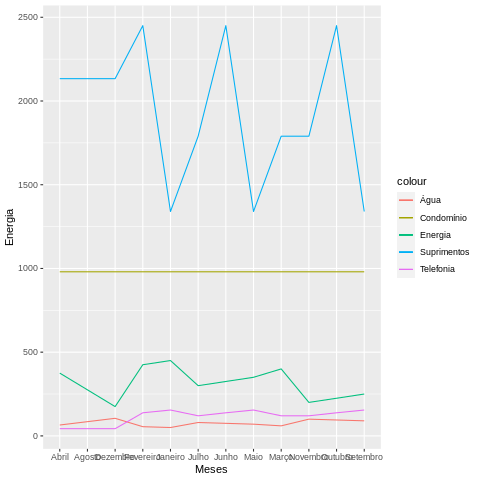

In [14]:
%%R
ggplot(data=contas,aes(x=Meses, group = 1) ) +
  geom_line(aes(y=Energia,color='Energia')) +
  geom_line(aes(y=Água,color='Água')) +
  geom_line(aes(y=Telefonia,color='Telefonia')) +
  geom_line(aes(y=Condomínio,color='Condomínio')) +
  geom_line(aes(y=Suprimentos,color='Suprimentos'))  

In [15]:
%%R

contas_melt <- read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/Plan3%20-%20melt.csv')
contas_melt

Rows: 60 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Categoria, Meses

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 60 × 3
   Categoria Meses     Valores
   <chr>     <chr>       <dbl>
 1 Água      Janeiro        50
 2 Água      Fevereiro      55
 3 Água      Março          60
 4 Água      Abril          65
 5 Água      Maio           70
 6 Água      Junho          75
 7 Água      Julho          80
 8 Água      Agosto         85
 9 Água      Setembro       90
10 Água      Outubro        95
# … with 50 more rows


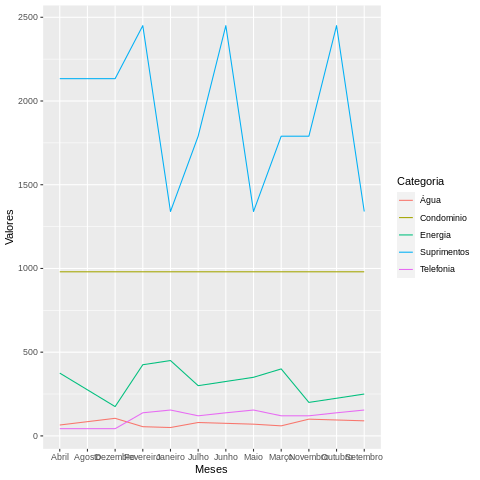

In [16]:
%%R
ggplot(data=contas_melt,aes(x=Meses, y=Valores, group=Categoria, color = Categoria) ) +
  geom_line() 

In [ ]:
%%R
install.packages("reshape2")
library(reshape2)

In [18]:
%%R
contas_m <- contas %>% melt(id="Meses", value.name="Valores")
contas_m

       Meses    variable Valores
1    Janeiro        Água   50.00
2  Fevereiro        Água   55.00
3      Março        Água   60.00
4      Abril        Água   65.00
5       Maio        Água   70.00
6      Junho        Água   75.00
7      Julho        Água   80.00
8     Agosto        Água   85.00
9   Setembro        Água   90.00
10   Outubro        Água   95.00
11  Novembro        Água  100.00
12  Dezembro        Água  105.00
13   Janeiro     Energia  450.00
14 Fevereiro     Energia  425.00
15     Março     Energia  400.00
16     Abril     Energia  375.00
17      Maio     Energia  350.00
18     Junho     Energia  325.00
19     Julho     Energia  300.00
20    Agosto     Energia  275.00
21  Setembro     Energia  250.00
22   Outubro     Energia  225.00
23  Novembro     Energia  200.00
24  Dezembro     Energia  175.00
25   Janeiro   Telefonia  154.50
26 Fevereiro   Telefonia  138.00
27     Março   Telefonia  120.00
28     Abril   Telefonia   43.00
29      Maio   Telefonia  154.50
30     Jun

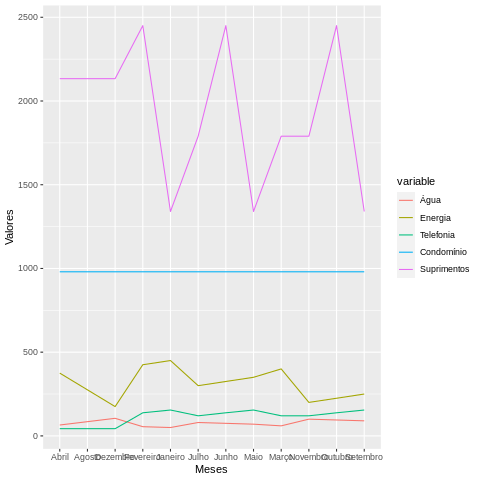

In [19]:
%%R
ggplot(data=contas_m,aes(x=Meses, y=Valores, group=variable, color = variable) ) +
  geom_line() 

In [20]:
%%R
alunos_por_curso <- notas %>% group_by(Curso) %>% summarize(qtd = NROW(Curso))
alunos_por_curso

# A tibble: 3 × 2
  Curso   qtd
  <chr> <int>
1 ADM       6
2 DIR       4
3 ECO       2


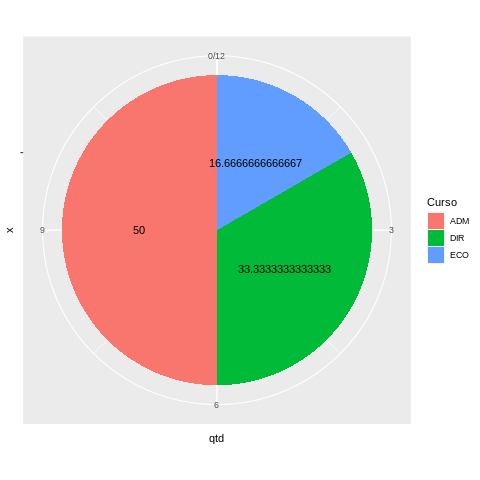

In [21]:
%%R
ggplot(data=alunos_por_curso,aes(x="",y=qtd,fill=Curso)) + 
  geom_bar(stat='identity') +
  coord_polar("y") +
  geom_text(aes(label = qtd/sum(qtd)*100),position=position_stack(vjust = 0.5) )